In [1]:
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from craft import uvfits, craco_plan, fdmt as FDMT
import craco.search_pipeline
from craco.pyxrtutil import pyxrt

In [3]:
from Visibility_injector.inject_in_fake_data import FakeVisibility

In [4]:
xclbin='/data/seren-01/fast/ban115/build/xclbin/binary_container_fe3fef0d.xclbin'
alloc_device_only = True

fits_file = "/home/gup037/tmp/frb_d0_t0_a1_sninf_lm00.fits"
f = uvfits.open(fits_file)
values = craco.search_pipeline.get_parser().parse_args([])
values.uv = fits_file
values.ndm = 512

In [5]:
device = pyxrt.device(1)
xbin = pyxrt.xclbin(xclbin)
uuid = device.load_xclbin(xbin)

In [6]:
plan = craco_plan.PipelinePlan(f, values)

/home/gup037/Codes/craft/src/craft/uvfits.py:100: UserWarning: Unknown int time in file. returning 1ms
  warnings.warn('Unknown int time in file. returning 1ms')
/home/gup037/Codes/craft/src/craft/craco_plan.py:140: UserWarning: Cannot grid things on U=0 or V=0 blid=515.0 2-3 uvpix=(254, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:140: UserWarning: Cannot grid things on U=0 or V=0 blid=515.0 2-3 uvpix=(253, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:140: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 1-4 uvpix=(253, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:140: UserWarning: Cannot grid things on U=0 or V=0 blid=1029.0 4-5 uvpix=(0, 251)
  warnings.warn(f'Cannot grid things on U=0 or V=0

Upper registers [(3, 1), (4, 1), (34, 2), (35, 2), (36, 2), (37, 2), (38, 2), (39, 2), (40, 2), (41, 2), (42, 2), (43, 2), (44, 2), (45, 2), (46, 2), (87, 2), (88, 2), (89, 2), (90, 2), (91, 2), (92, 2), (93, 2), (94, 2), (95, 2), (96, 2), (97, 2), (98, 2), (99, 2), (100, 2), (101, 2), (102, 2), (103, 2)]
Lower registers [(1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (4, 7), (2, 8), (4, 8), (2, 9), (3, 9), (4, 9), (5, 9), (3, 10), (5, 10), (7, 10), (3, 11), (5, 11), (6, 11), (7, 11), (7, 12), (8, 12), (8, 13), (9, 13), (7, 14), (8, 14), (9, 14), (8, 15), (8, 16), (9, 16), (2, 17)]


In [7]:
p = craco.search_pipeline.Pipeline(device, xbin, plan, alloc_device_only)

Kernel krnl_ddgrid_reader_4cu:krnl_ddgrid_reader_4cu_1 has groups
GID=0=32
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=15
Kernel krnl_grid_4cu:krnl_grid_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=6
Kernel krnl_grid_4cu:krnl_grid_4cu_2 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=7
Kernel krnl_grid_4cu:krnl_grid_4cu_3 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=20
Kernel krnl_grid_4cu:krnl_grid_4cu_4 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=21
Kernel fft2d:fft2d_1 has groups
Kernel fft2d:fft2d_2 has groups
Kernel fft2d:fft2d_3 has groups
Kernel fft2d:fft2d_4 has groups
Kernel krnl_boxc_4cu:krnl_boxc_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=54
GID=4=54
GID=5=4
Kernel fdmt_tunable_c32:fdmt_tunable_c32_1 has groups
GID=0=52
GID=1=32
GID=2=53
GID=3=53
GID=4=14
Allocated 360428 bytes flags=flags.normal groupid=6 address=0x60000000
Allocated 360428 bytes flags=flags.normal groupid=7 address=0x70000000
Allo

In [9]:
nt = 256
huge_block = 16*np.ones((plan.nbl, plan.nf, plan.nt * 5), dtype=np.complex64)
#huge_block += np.random.normal(0, 128, huge_block.size).reshape(huge_block.shape)
bcs = []
#fake_block = np.ones((plan.nbl, plan.nf, nt))

In [10]:
def get_blocks(big_block, nt):
    tot_samps = big_block.shape[-1]
    nblocks = tot_samps // nt
    for iblock in range(nblocks):
        my_block = big_block[:, :, iblock*nt : (iblock+1)*nt ]
        yield my_block

In [ ]:
datasource = get_blocks(huge_block, nt)


In [ ]:
for iblk in range(5):
    print("iblk = ", iblk)
    fake_block = next(datasource)
    block = np.ma.masked_array(data = fake_block, mask = False) #+ np.ones_like(fake_block)*128 + 128j* np.ones_like(fake_block)
    p.copy_input(block, values, calibrate=False)
    p.run(iblk, values).wait()
    bcs.append(p.boxcar_history.copy_from_device().nparr)

In [ ]:
len(bcs)

In [ ]:
plt.figure()
for ibc, bc in enumerate(bcs):
    if ibc == len(bcs)-1:
        for it in range(7):
            plt.plot(bc[:, -1*(it+1), 0, 0])
#plt.legend()
plt.xlabel("iDM")
plt.ylabel("FDMT output")

bcs[-1][0, :, 0 , 0]

In [ ]:
block

In [ ]:
thefdmt = FDMT.Fdmt(f_min = plan.fmin, f_off = plan.foff, n_f = plan.nf, max_dt = plan.nd, n_t = plan.nt*5, history_dtype=np.float64)

In [ ]:
fdmtout = thefdmt.__call__(huge_block.real.sum(axis=0))


In [ ]:
fdmtout.shape, fdmtout.dtype

<IPython.core.display.Javascript object>


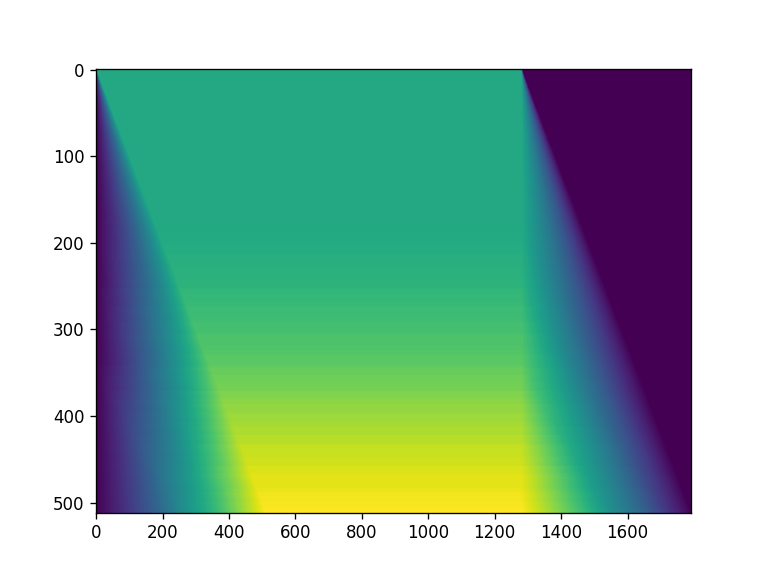

In [46]:
plt.figure()
plt.imshow(fdmtout, aspect='auto')

<IPython.core.display.Javascript object>


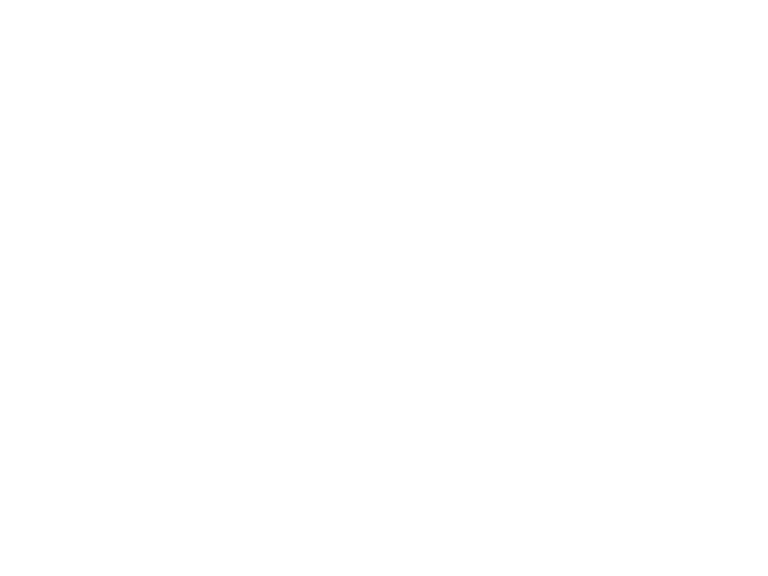

Text(0.5, 1.0, 'Comparison of Py FDMT vs HW FDMT for phase center when input is 1')

In [19]:
plt.figure()
plt.plot(fdmtout[:, 4*plan.nt] * craco.search_pipeline.calc_fft_scale(values.fft_shift1, values.fft_shift2), label='Full py_fdmt')
plt.plot(bcs[-1][:, -1, 0, 0], label="HW fdmt")
plt.xlabel("iDM")
plt.ylabel("FDMT out")
plt.legend()
plt.title("Comparison of Py FDMT vs HW FDMT for phase center when input is 1")

In [20]:
25/760

0.03289473684210526

In [17]:
sg, ng = p.calculate_processing_gain(values.fft_shift1, values.fft_shift2)

In [18]:
sg, ng

(47.5, 0.2153757617514097)

In [23]:
sg * 6000, fdmtout[0, 0]

(285000.0, 778240.0)

In [24]:
block.real.sum(axis=0).sum(axis=0)[0], fdmtout[0,0]

(778240.0, 778240.0)

In [25]:
fdmtout[0,0] / 1024

760.0

In [26]:
1/craco.search_pipeline.calc_fft_scale(values.fft_shift1, values.fft_shift2)

1024.0

In [27]:
p.num_input_cells

48640

In [28]:
plan.nbl * plan.nf

48640

<IPython.core.display.Javascript object>


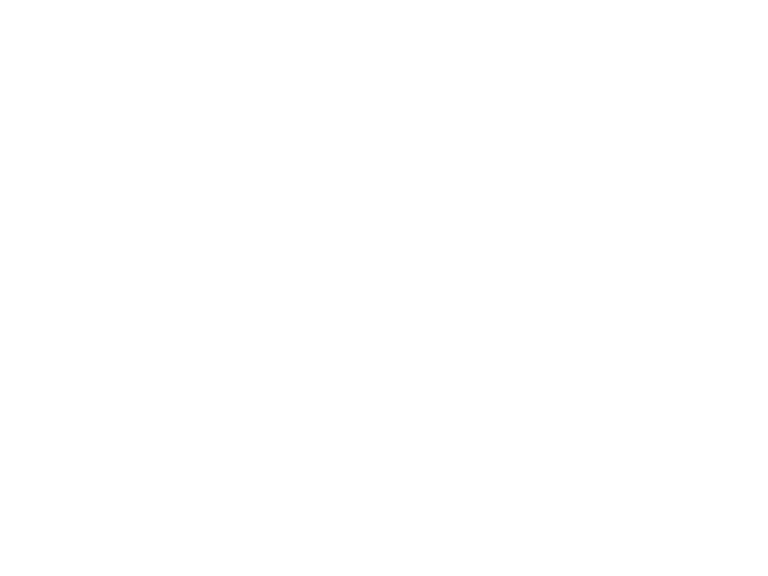

In [29]:
plt.figure()
plt.imshow(np.fft.fftshift(bcs[-1][0, -1, :, :]), aspect='auto')

In [8]:
def block_gen(nt = 256, nblocks = 1e4):
    iblock = 0
    block_shape = (plan.nbl, plan.nf, plan.nt)
    block_size = plan.nbl * plan.nf * plan.nt
    while iblock < nblocks:
        new_block = 0*np.ones(block_shape, dtype=np.complex64) + np.random.normal(0, 128, block_size).reshape(block_shape)
        block = np.ma.masked_array(data = new_block, mask = False)
        yield new_block


In [20]:
thefdmt = FDMT.Fdmt(f_min = plan.fmin, f_off = plan.foff, n_f = plan.nf, max_dt = plan.nd, n_t = plan.nt, history_dtype=np.float64)
Overlap_Sum = FDMT.OverlapAndSum(nd=plan.nd, nt=plan.nt, dtype=np.float32)
py_past = []
hw_bcs = []

In [21]:
blocks_giver = block_gen()
for iblk, block in enumerate(blocks_giver):
    pyfdmtout = thefdmt(block.real.sum(axis=0))
    ofdmtout = Overlap_Sum(pyfdmtout)
    py_past.append(ofdmtout)
    print(iblk, 'a')
    
    myblock = np.ma.masked_array(data = block, mask = False)
    p.copy_input(myblock, values, calibrate=False)
    p.run(iblk, values).wait()
    hw_bcs.append(p.boxcar_history.copy_from_device().nparr[..., 0, 0])
    print(iblk, 'b')
    if iblk > 1000:
        break

0 a
0 b
1 a
1 b
2 a
2 b
3 a
3 b
4 a
4 b
5 a
5 b
6 a
6 b
7 a
7 b
8 a
8 b
9 a
9 b
10 a
10 b
11 a
11 b
12 a
12 b
13 a
13 b
14 a
14 b
15 a
15 b
16 a
16 b
17 a
17 b
18 a
18 b
19 a
19 b
20 a
20 b
21 a
21 b
22 a
22 b
23 a
23 b
24 a
24 b
25 a
25 b
26 a
26 b
27 a
27 b
28 a
28 b
29 a
29 b
30 a
30 b
31 a
31 b
32 a
32 b
33 a
33 b
34 a
34 b
35 a
35 b
36 a
36 b
37 a
37 b
38 a
38 b
39 a
39 b
40 a
40 b
41 a
41 b
42 a
42 b
43 a
43 b
44 a
44 b
45 a
45 b
46 a
46 b
47 a
47 b
48 a
48 b
49 a
49 b
50 a
50 b
51 a
51 b
52 a
52 b
53 a
53 b
54 a
54 b
55 a
55 b
56 a
56 b
57 a
57 b
58 a
58 b
59 a
59 b
60 a
60 b
61 a
61 b
62 a
62 b
63 a
63 b
64 a
64 b
65 a
65 b
66 a
66 b
67 a
67 b
68 a
68 b
69 a
69 b
70 a
70 b
71 a
71 b
72 a
72 b
73 a
73 b
74 a
74 b
75 a
75 b
76 a
76 b
77 a
77 b
78 a
78 b
79 a
79 b
80 a
80 b
81 a
81 b
82 a
82 b
83 a
83 b
84 a
84 b
85 a
85 b
86 a
86 b
87 a
87 b
88 a
88 b
89 a
89 b
90 a
90 b
91 a
91 b
92 a
92 b
93 a
93 b
94 a
94 b
95 a
95 b
96 a
96 b
97 a
97 b
98 a
98 b
99 a
99 b
100 a
100 b
101 a
10

701 b
702 a
702 b
703 a
703 b
704 a
704 b
705 a
705 b
706 a
706 b
707 a
707 b
708 a
708 b
709 a
709 b
710 a
710 b
711 a
711 b
712 a
712 b
713 a
713 b
714 a
714 b
715 a
715 b
716 a
716 b
717 a
717 b
718 a
718 b
719 a
719 b
720 a
720 b
721 a
721 b
722 a
722 b
723 a
723 b
724 a
724 b
725 a
725 b
726 a
726 b
727 a
727 b
728 a
728 b
729 a
729 b
730 a
730 b
731 a
731 b
732 a
732 b
733 a
733 b
734 a
734 b
735 a
735 b
736 a
736 b
737 a
737 b
738 a
738 b
739 a
739 b
740 a
740 b
741 a
741 b
742 a
742 b
743 a
743 b
744 a
744 b
745 a
745 b
746 a
746 b
747 a
747 b
748 a
748 b
749 a
749 b
750 a
750 b
751 a
751 b
752 a
752 b
753 a
753 b
754 a
754 b
755 a
755 b
756 a
756 b
757 a
757 b
758 a
758 b
759 a
759 b
760 a
760 b
761 a
761 b
762 a
762 b
763 a
763 b
764 a
764 b
765 a
765 b
766 a
766 b
767 a
767 b
768 a
768 b
769 a
769 b
770 a
770 b
771 a
771 b
772 a
772 b
773 a
773 b
774 a
774 b
775 a
775 b
776 a
776 b
777 a
777 b
778 a
778 b
779 a
779 b
780 a
780 b
781 a
781 b
782 a
782 b
783 a
783 b
784 a
784 

In [16]:
len(py_past), len(hw_bcs), py_past[0].shape, hw_bcs[0].shape

(1154, 1154, (512, 256), (1024, 7))

In [23]:
py_past_combined = np.concatenate(py_past, axis=1)
hw_past_combined = np.concatenate(hw_bcs, axis=1)

    

In [24]:
sg, ng = p.calculate_processing_gain(values.fft_shift1, values.fft_shift2)

<IPython.core.display.Javascript object>


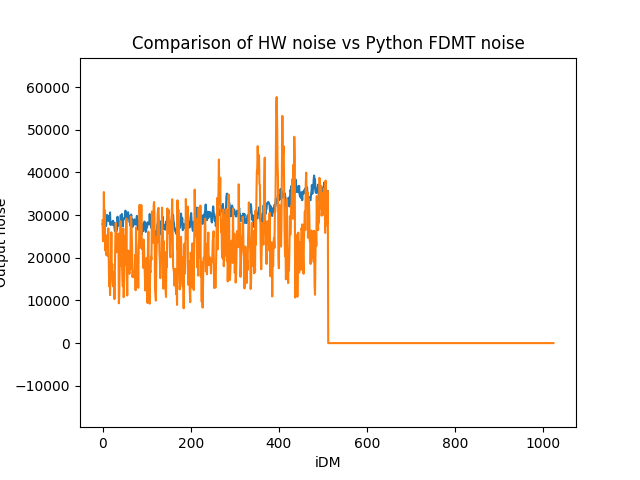

Text(0.5, 1.0, 'Comparison of HW noise vs Python FDMT noise')

In [25]:
plt.figure()
plt.plot(py_past_combined.std(axis=1), label="Python FDMT")
plt.plot(hw_past_combined.std(axis=1) * (ng*4000), label="HW FDMT..")
plt.xlabel("iDM")
plt.ylabel("Output noise")
plt.title("Comparison of HW noise vs Python FDMT noise")